In [1]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from file
df = pd.read_csv('adult.data.csv', delimiter = ',')

#displaying random sample from the dataset
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10000,34,Private,120461,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,50,United-States,<=50K
21899,67,Private,105216,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
3909,33,Self-emp-inc,139057,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,84,Taiwan,>50K
29685,45,Private,233799,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
14057,24,Private,52242,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,>50K
29892,51,Private,673764,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,27828,0,40,United-States,>50K
16850,28,Private,65171,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
24553,30,Private,209317,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,Dominican-Republic,<=50K
17723,18,?,115258,11th,7,Never-married,?,Own-child,White,Male,0,0,12,United-States,<=50K
25048,30,Private,337908,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,20,United-States,<=50K


In [3]:
#replacing all the columns with '?' in DataFrame to N.A (Not Available). 
df.replace('?', 'N.A', inplace = True)

In [4]:
#crosschecking
df[df['occupation'] == 'N.A']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,N.A,180211,Some-college,10,Married-civ-spouse,N.A,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,N.A,293936,7th-8th,4,Married-spouse-absent,N.A,Not-in-family,White,Male,0,0,40,N.A,<=50K
69,25,N.A,200681,Some-college,10,Never-married,N.A,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,N.A,212759,10th,6,Married-civ-spouse,N.A,Husband,White,Male,0,0,2,United-States,<=50K
106,17,N.A,304873,10th,6,Never-married,N.A,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,N.A,320084,Bachelors,13,Married-civ-spouse,N.A,Wife,White,Female,0,0,55,United-States,>50K
32531,30,N.A,33811,Bachelors,13,Never-married,N.A,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,N.A,287372,Doctorate,16,Married-civ-spouse,N.A,Husband,White,Male,0,0,10,United-States,>50K
32541,41,N.A,202822,HS-grad,9,Separated,N.A,Not-in-family,Black,Female,0,0,32,United-States,<=50K


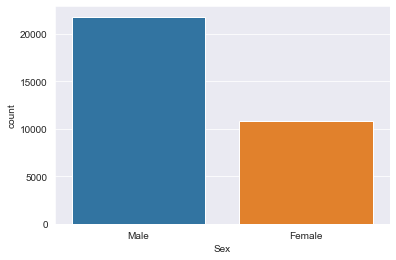

In [6]:
#checking male to female ratio
sns.set_style('darkgrid')
sns.countplot(x = 'sex', data = df)
plt.xlabel('Sex')
plt.show()

In [7]:
# How many of each race are represented in this dataset? 
race_count = df['race'].value_counts().to_dict()
print(f'{"Race":>18}: Value\n')
for race, value in race_count.items():
    print(f'{race:>18}: {value:,}.')

              Race: Value

             White: 27,816.
             Black: 3,124.
Asian-Pac-Islander: 1,039.
Amer-Indian-Eskimo: 311.
             Other: 271.


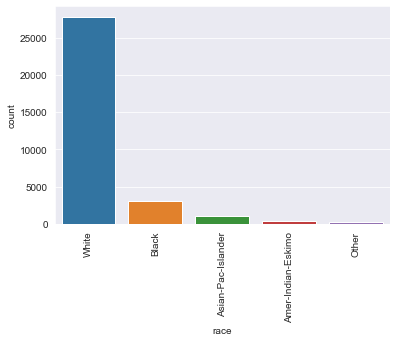

In [41]:
ax = sns.countplot(x = 'race', data = df)
plt.xticks(rotation  = 90)
plt.show()

In [13]:
# What is the average age of men and women ?
average_age = df.groupby('sex')['age'].mean()
print(round(average_age, 2))

sex
Female    36.86
Male      39.43
Name: age, dtype: float64


In [23]:
# What is the percentage of people who have a Bachelor's degree?
bsc_per = (len(df[df['education'] == 'Bachelors'])/len(df['education']))*100
print(f'The percentage of the people with Bsc degree is: {bsc_per:.2f}%')

The percentage of the people with Bsc degree is: 16.45%


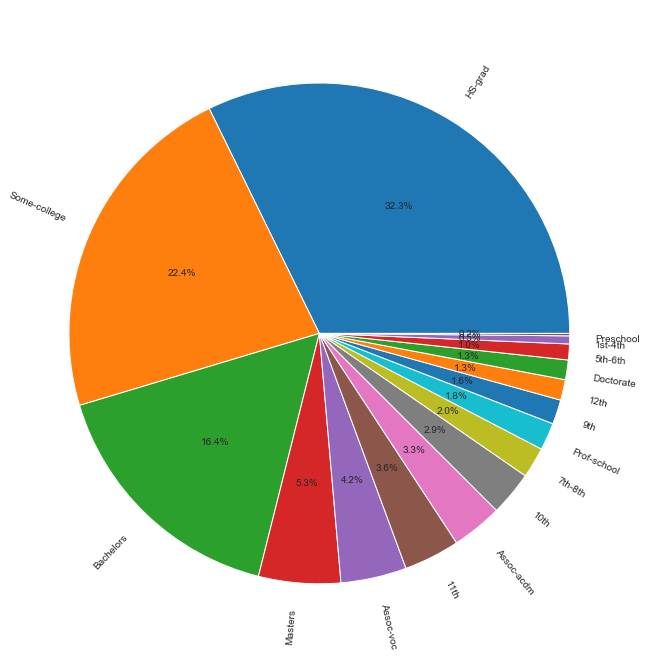

In [24]:
edu = df['education'].value_counts().to_dict()

#initializing keys and values of the dict for parsing into list
qual = []
num = []

for k, v in edu.items():
    qual.append(k)
    num.append(v)
    
plt.figure(figsize=(10,12))    
plt.pie(num ,labels = qual, labeldistance = 1.1, rotatelabels = True, autopct = '%0.1f%%')
plt.axis('equal')
plt.show()

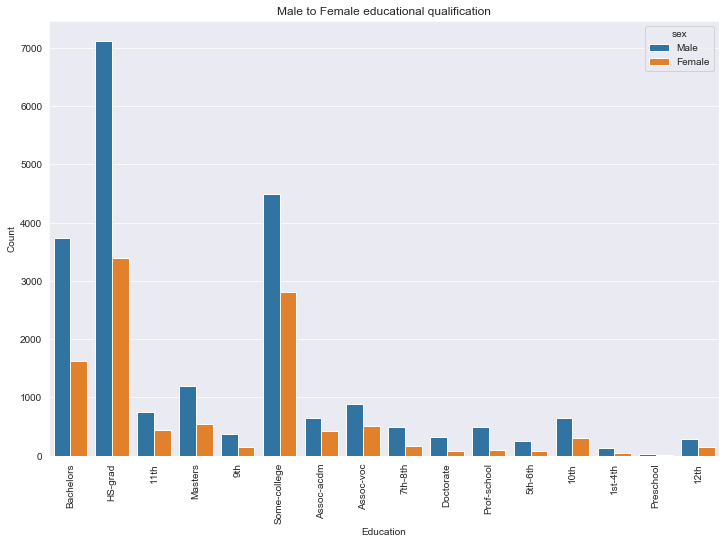

In [37]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x ='education' , hue = 'sex', data = df)
ax.set(xlabel = 'Education', ylabel = 'Count',
        title = 'Male to Female educational qualification')
plt.xticks(rotation=90)
plt.show()

In [33]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
higher_edu = df[df['education'].isin(['Bachelors', 'Masters','Doctorate'])]
higher_edu_richer = higher_edu[higher_edu['salary'] == '>50K']

print('The percentage of people with advanced education that earn more than 50k is: \n')
print(f'{(len(higher_edu_richer)/len(higher_edu))*100:.2f}%')

The percentage of people with advanced education that earn more than 50k is: 

46.54%


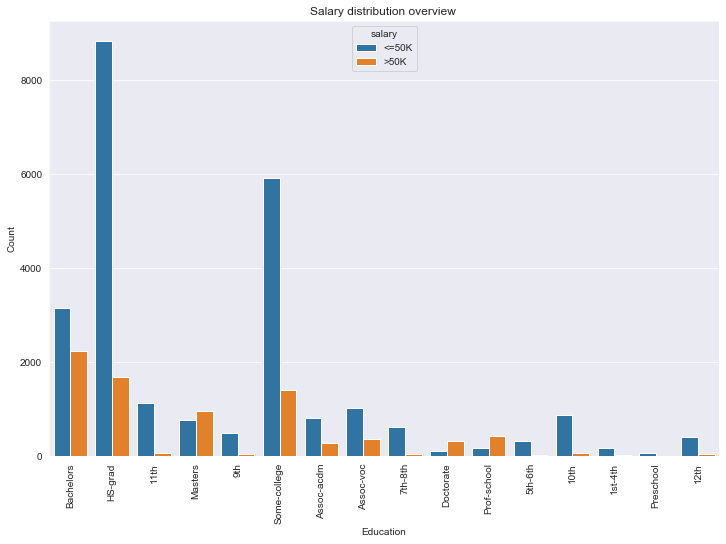

In [39]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'education', hue = 'salary', data = df)
ax.set(ylabel = 'Count', xlabel = 'Education',
        title = 'Salary distribution overview ')
plt.xticks(rotation=90)
plt.show()

In [42]:
# What percentage of people without advanced education make more than 50K?
lower_edu = df[df['education'].isin(['HS-grad', '11th', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])]
lower_edu_richer = lower_edu[lower_edu['salary'] == '>50K']

print('The percentage of people without advanced education that earn more than 50k is: \n')
print(f'{(len(lower_edu_richer)/len(lower_edu))*100:.2f}%')

The percentage of people without advanced education that earn more than 50k is: 

17.37%


In [45]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_hrs_week = df['hours-per-week'].min()
max_hrs_week = df['hours-per-week'].max()
avg_hrs_week = df['hours-per-week'].mean()

print(f'The minimum number of hours a person works per week: {min_hrs_week}')
print(f'The maximum number of hours a person works per week: {max_hrs_week}')
print(f'The average number of working hours per week: {round(avg_hrs_week)}')

The minimum number of hours a person works per week: 1
The maximum number of hours a person works per week: 99
The average number of working hours per week: 40


{'Prof-specialty': 4140, 'Craft-repair': 4099, 'Exec-managerial': 4066, 'Adm-clerical': 3770, 'Sales': 3650, 'Other-service': 3295, 'Machine-op-inspct': 2002, 'N.A': 1843, 'Transport-moving': 1597, 'Handlers-cleaners': 1370, 'Farming-fishing': 994, 'Tech-support': 928, 'Protective-serv': 649, 'Priv-house-serv': 149, 'Armed-Forces': 9}


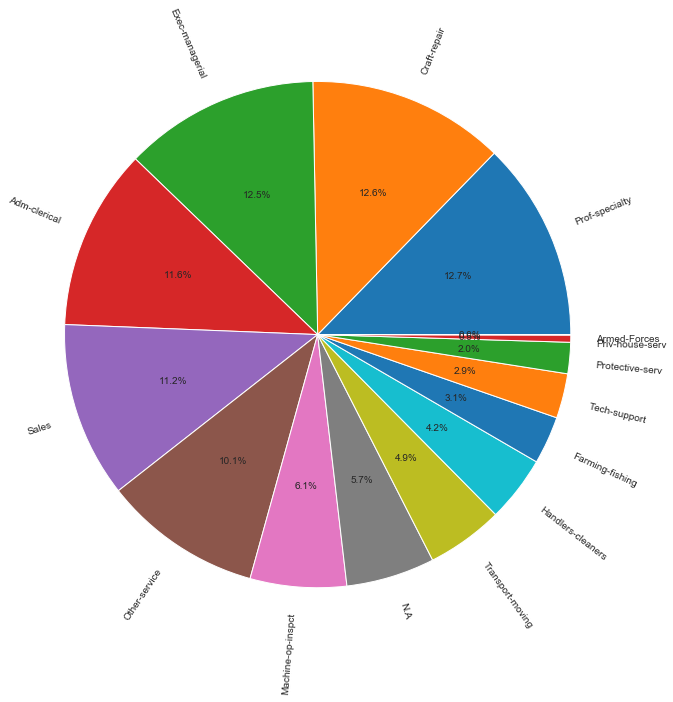

In [47]:
#percentage of people for each occupation
df_occ = df['occupation'].value_counts().to_dict()

occ = []
size  = []
print(df_occ)
for x,y in df_occ.items():
    occ.append(x)
    size.append(y)
plt.figure(figsize=(10,12))    
plt.pie(size,labels = occ, labeldistance = 1.1, rotatelabels = True, autopct = '%0.1f%%')
plt.axis('equal')
plt.show()

In [48]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
min_worker = df[df['hours-per-week'] == 1]
min_worker_rich = min_worker[min_worker['salary'] == '>50K']

#calculating the percentage
print('The percentage of high earner among the minimum number of hours worker:')
print(f'{(len(min_worker_rich)/len(min_worker))*100:.0f}%')

The percentage of high earner among the minimum number of hours worker:
10%


In [49]:
# How many number of average working hours earn above and below 50K

high_earner = df[(df['hours-per-week'] == 40) & (df['salary'] == '>50K')]
print(f'The number of people working average hours earning above 50K: {len(high_earner)}\n')

#percentage of high earner among average hours workers
avg_worker = df[df['hours-per-week'] == 40]
avg_worker_rich = avg_worker[avg_worker['salary'] == '>50K']

#calculating the percentage
print('The percentage of high earner among the average number of hours worker:')
print(f'{(len(avg_worker_rich)/len(avg_worker))*100:.0f}%')

The number of people working average hours earning above 50K: 3247

The percentage of high earner among the average number of hours worker:
21%


In [50]:
# What country has the highest percentage of people that earn >50K?
grouped = df[df['salary'].isin(['>50K'])]
high_country = grouped['native-country'].value_counts()
percent = (high_country[0]/sum(high_country))*100

print(f'Out of {sum(high_country):,} workers earning above 50K, {high_country[0]:,} are from {high_country.idxmax()}\n')
print(f'{round(percent,2)}% of people earning above 50K are from {high_country.idxmax()}.')

Out of 7,841 workers earning above 50K, 7,171 are from United-States

91.46% of people earning above 50K are from United-States.


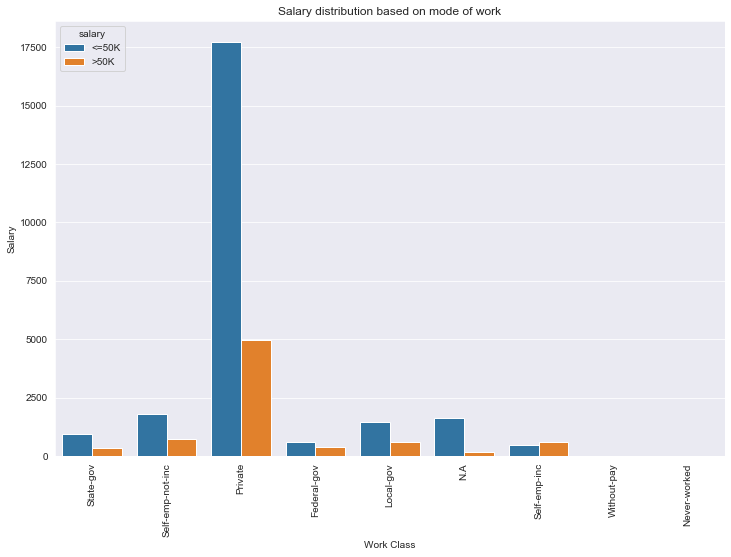

In [51]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'workclass', hue = 'salary', data = df)
ax.set(xlabel = 'Work Class', ylabel = 'Salary',
        title = 'Salary distribution based on mode of work')
plt.xticks(rotation = 90)
plt.show()

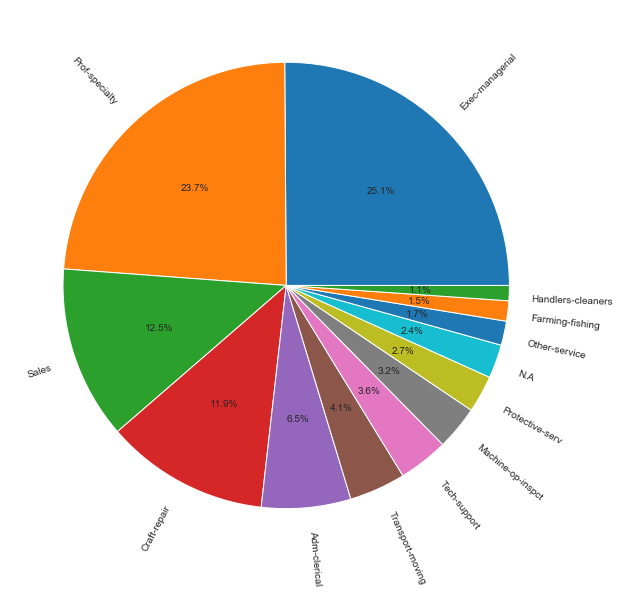

In [53]:
#which occupation gives the highest percentage among big earners
big_occ = df[df['salary'].isin(['>50K'])]
big_occ = big_occ['occupation'].value_counts(sort=True).to_dict()

#initializing the list
occ = []
number = []

for key, value in big_occ.items():
    occ.append(key)
    number.append(value)
    
#plotting pie chart
plt.figure(figsize = (10,12))
ax = plt.pie(x= number[:13], labels= occ[:13], rotatelabels = True, autopct = '%0.1f%%')

#occupation with 0.001% were sliced off to give better visualization

In [55]:
# Identify the most popular occupation for those who earn >50K in India.
grouped = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]
pop_occ = grouped['occupation'].value_counts()

print(f'The most popular profession among big earners from India is: {pop_occ.idxmax()}')
print(f'With {pop_occ[0]:,} out of {sum(pop_occ)} total big earners from India.')

The most popular profession among big earners from India is: Prof-specialty
With 25 out of 40 total big earners from India.


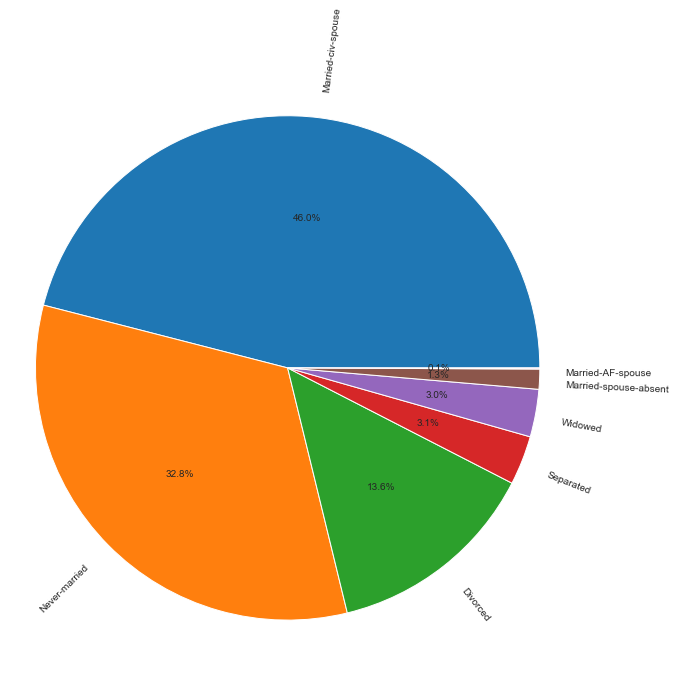

In [59]:
#The marital status of of the big earners among those with higher degrees

df_big_earner = df[(df['salary'] == '>50K') & (df['education'].isin(['Bachelors', 'Masters','Doctorate']))]

df_big_earner = df['marital-status'].value_counts().to_dict()

occ = []
size  = []

for x,y in df_big_earner.items():
    occ.append(x)
    size.append(y)
plt.figure(figsize=(10,12))
plt.pie(size,labels = occ, labeldistance = 1.1, rotatelabels = True, autopct = '%0.1f%%')
plt.axis('equal')
plt.show()

In [60]:
# Comparing ratio of black and white among big earners.
white_black = df[df['salary'] == '>50K']

print(f'{"Race":<21} {"Value Count"}\n')
print(white_black['race'].value_counts())

#picking the highest percentage 
high_per = white_black['race'].value_counts(1)[0]*100
high_color = white_black['race'].value_counts().idxmax()
print(f'\n{high_per:.2f}% of the big earners are {high_color}.')

Race                  Value Count

White                 7117
Black                  387
Asian-Pac-Islander     276
Amer-Indian-Eskimo      36
Other                   25
Name: race, dtype: int64

90.77% of the big earners are White.


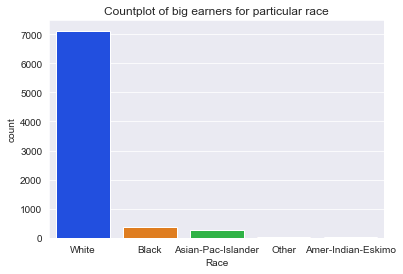

In [62]:
#countplot to visualize the difference
sns.countplot(white_black['race'], palette = 'bright')
plt.xlabel('Race')
plt.title('Countplot of big earners for particular race')
plt.show()

In [63]:
#Comparing male to female ratio of big among big earners
male_female = df[df['salary'] == '>50K']

print(f'{"Gender":<9} {"Value Count"}\n')
print(male_female['sex'].value_counts())

#picking the highest percentage 
gender_percent = male_female['sex'].value_counts(1)[0]*100
gen = male_female['sex'].value_counts().idxmax()
print(f'\n{gender_percent:.2f}% of the big earners are {gen}.')

Gender    Value Count

Male      6662
Female    1179
Name: sex, dtype: int64

84.96% of the big earners are Male.


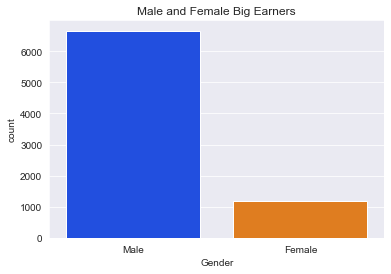

In [66]:
#countplot to visualize the difference
sns.countplot(male_female['sex'], palette = 'bright')
plt.xlabel('Gender')
plt.title('Male and Female Big Earners')
plt.show()

- Visualizing the educational qualification of Blacks & Whites.

In [67]:
#subsetting for only blacks
black_edu  = df[df['race'] == 'Black']

#pie plot visualization for educational qualification
blacky = black_edu['education'].value_counts().to_dict()
print(blacky)   
print(f'\nMajority of the black, {(blacky["HS-grad"]/sum(blacky.values()))*100:.2f}% of them have HS-grad.')

{'HS-grad': 1174, 'Some-college': 746, 'Bachelors': 330, '11th': 153, '10th': 133, 'Assoc-voc': 112, 'Assoc-acdm': 107, '9th': 89, 'Masters': 86, '12th': 70, '7th-8th': 56, '5th-6th': 21, '1st-4th': 16, 'Prof-school': 15, 'Doctorate': 11, 'Preschool': 5}

Majority of the black, 37.58% of them have HS-grad.


In [68]:
#subsetting for only whites
white_edu  = df[df['race'] == 'White']

#pie plot visualization for educational qualification
whity = white_edu['education'].value_counts(sort=True).to_dict()
print(whity)
print(f'\nMajority of the white, {(whity["HS-grad"]/sum(whity.values()))*100:.2f}% of them have HS-grad.')

{'HS-grad': 8904, 'Some-college': 6207, 'Bachelors': 4682, 'Masters': 1537, 'Assoc-voc': 1207, '11th': 977, 'Assoc-acdm': 915, '10th': 762, '7th-8th': 553, 'Prof-school': 514, '9th': 403, 'Doctorate': 369, '12th': 335, '5th-6th': 279, '1st-4th': 134, 'Preschool': 38}

Majority of the white, 32.01% of them have HS-grad.


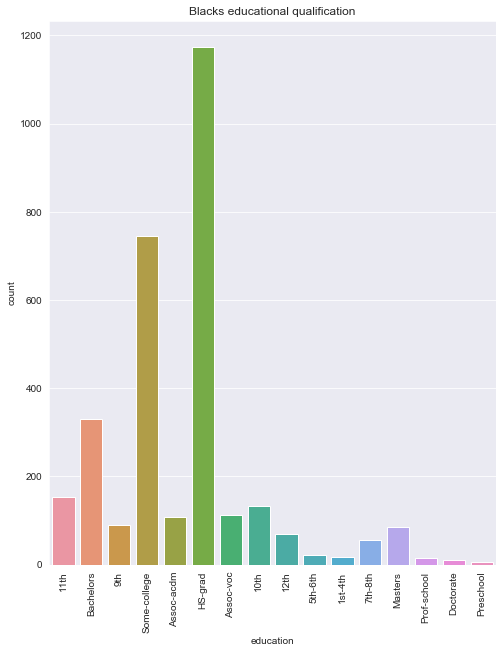

In [70]:
#visualizing the blacks educational qualification

plt.figure(figsize=(8, 10)) 
sns.countplot(black_edu['education'])
plt.title('Blacks educational qualification')
plt.xticks(rotation=90)
plt.show()

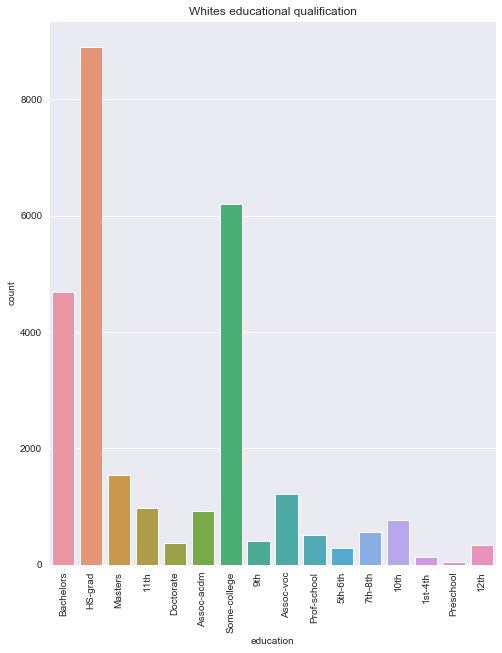

In [71]:
#visualizing whites educational qualification
plt.figure(figsize=(8, 10)) 
sns.countplot(white_edu['education'])
plt.title('Whites educational qualification')
plt.xticks(rotation=90)
plt.show()